## E-Commerce Shipping Data
**About the data**

**Context**

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.



**Columns detail**

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where **1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.**

![Ship](https://github.com/Kodchalerk/DataScienceProject/blob/main/Img/shipping.JPG?raw=true)

## Executive Summary

This notebook aim to discover key insights from the data by performing exploratory data analysis and build the model to predict the liklihood whether the shipment will be delivered on time by using Logistic Regression Model.

The project performed the following step
1. Data cleaning and exploratory data analysis
2. Data Preprocessing

    2.1 Data Encoding
    
    2.2 Feature Scaling
    
    2.3 Feature Selection
3. Model Building : Logistic Regression    
4. Model Improvement   



**Interesting Findings**
- Warehouse block F has the highest number of product counts and number of products that haven't reached on time.
- Shipping product by ship is the most popular choice for the customers.
- Most of the products are low priority and this type of product holds the highest number of product that unable to reach on time.

**The Final Model**

Two models were built in the process. The first model included ten attributes with the lower accuracy than the second model which is included only four attributes.

The second model has higher accuracy 64.18 % more than the first model which is 63.58 %. The second model included only four statistically significant features (p-value <= 0.05) which are:
1. Number of customer care calls
2. Number of prior purchases
3. Discount offered
4. Weight of the shipment(in grams)

The model indicates that the more the customer call made to enquire about the shipment, the higher chance that shipment will be made in time. The higher the weight and the number of purchase made, the higher chance that shipment will be made in time and **The more discount offer to the customer the higher the chance that the shipment will not make it on time**

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime as dt
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
url = 'https://github.com/Kodchalerk/DataScienceProject/blob/main/Raw/ShipmentPrediction.csv?raw=true'
df = pd.read_csv(url)

In [3]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data cleaning and exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# check for missing values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [8]:
# divide column into two types
col_numeric = ['Customer_care_calls','Customer_rating', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered', 'Weight_in_gms']
col_categorical = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender','Reached.on.Time_Y.N']

In [9]:
df[col_numeric].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


## Overview the Numerical Data

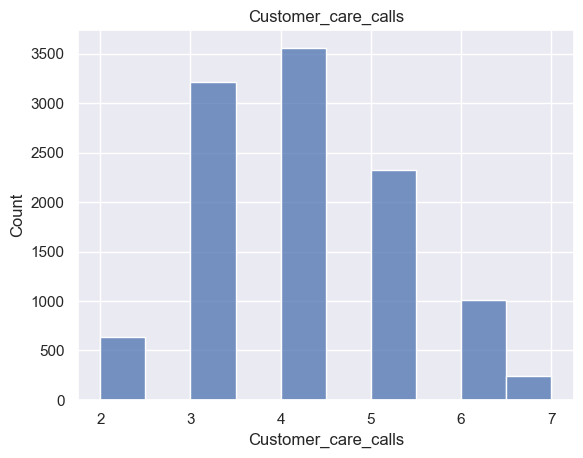

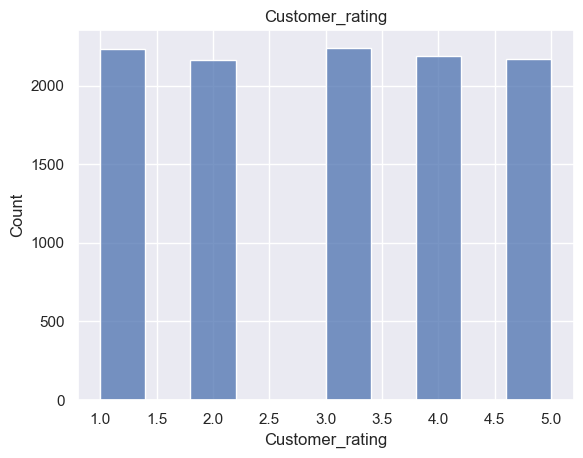

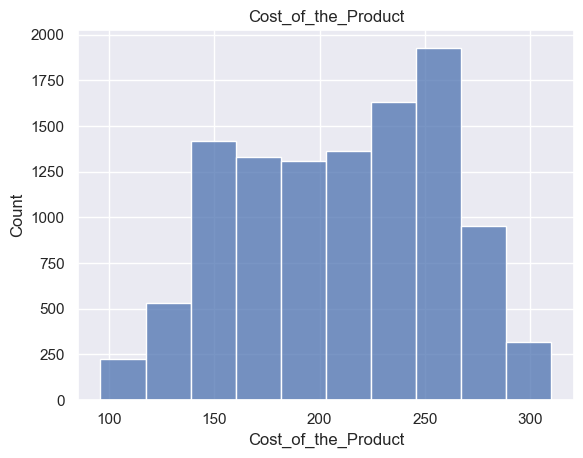

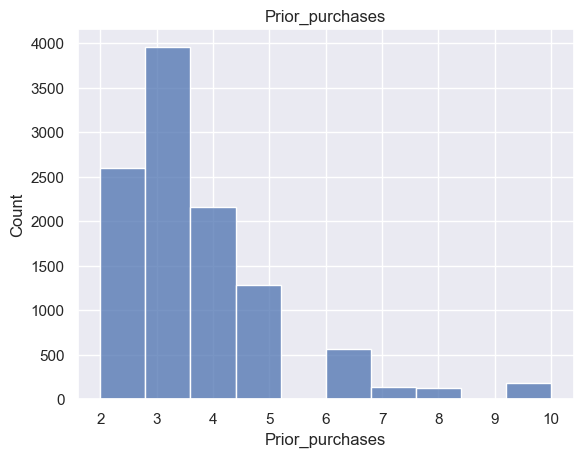

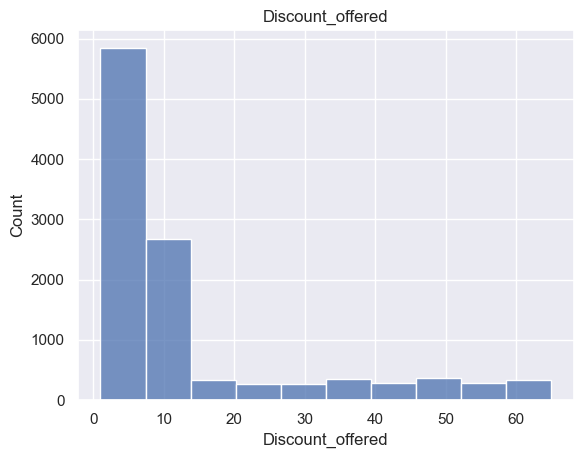

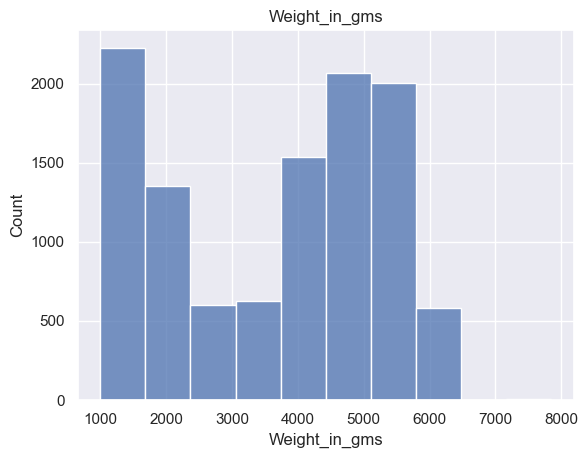

In [10]:
# Plot to overview data with numerical data
for i in col_numeric:
    sns.histplot(data=df, x = df[i] , bins = 10)
    plt.title(i)
    plt.show()

**Interesting Points**
- From figures above, we found that the higest number of calls customer made is four.
- Rating is evenly distributed from one to five.
- The cost of product which customer purchased tent to be normally distributed with the range from 100 to 300 and the mean is 210.
- The data of prior purchases is skewed right similar to the data of discount customer offered.

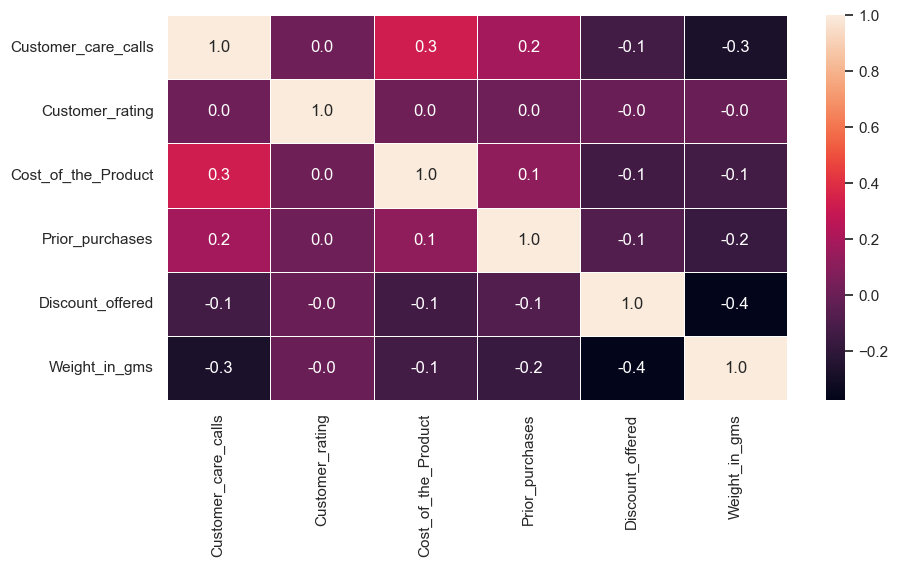

In [11]:
# Inspect the correlation of numerical data
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(df[col_numeric].corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax);

- It seems that the overall correlation between numerical data are weak. Except for **the correlation between the discount offered and the weight of the product** which is considered to be moderate according to the table below.


![Correlation](https://github.com/Kodchalerk/DataScienceProject/blob/main/Img/Correlation.JPG?raw=true)

## Overview the categorical data

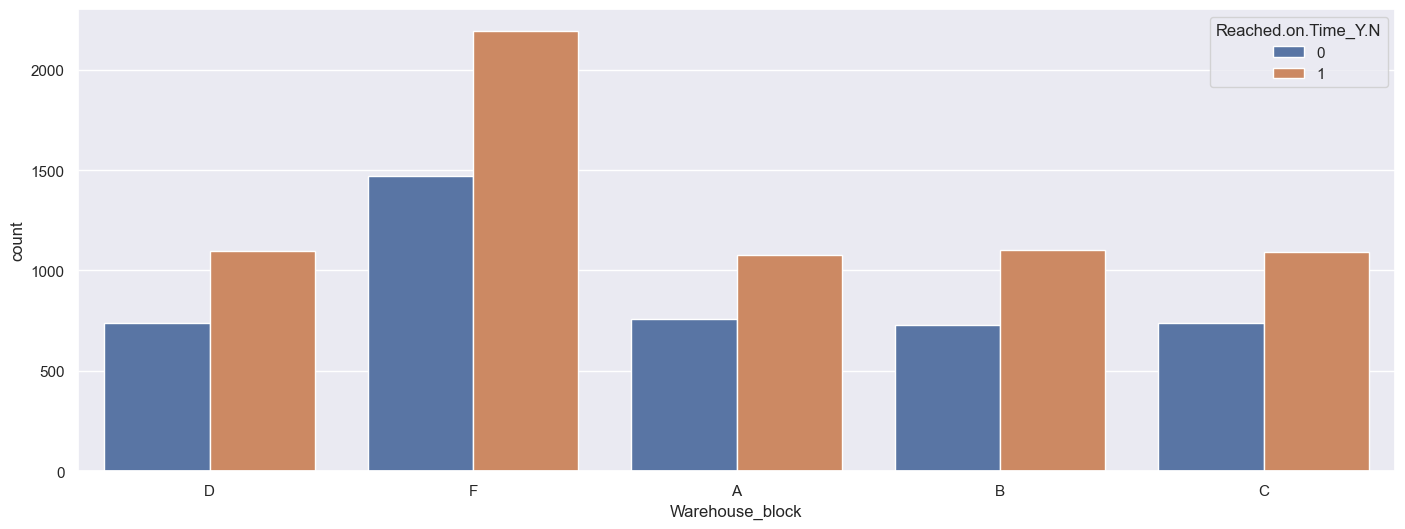

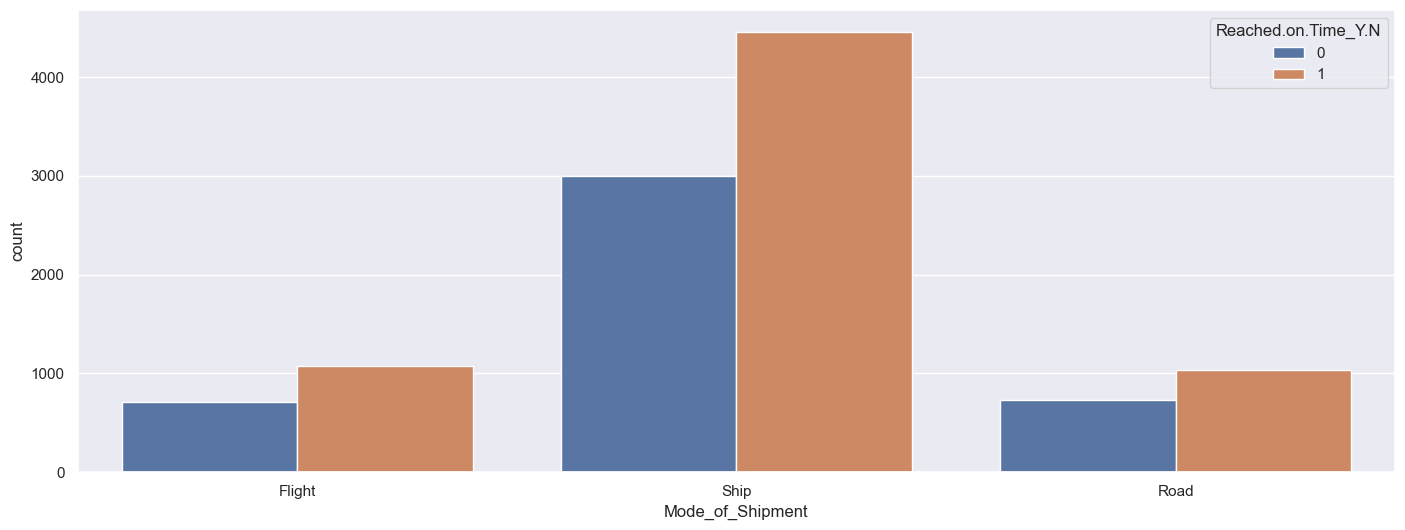

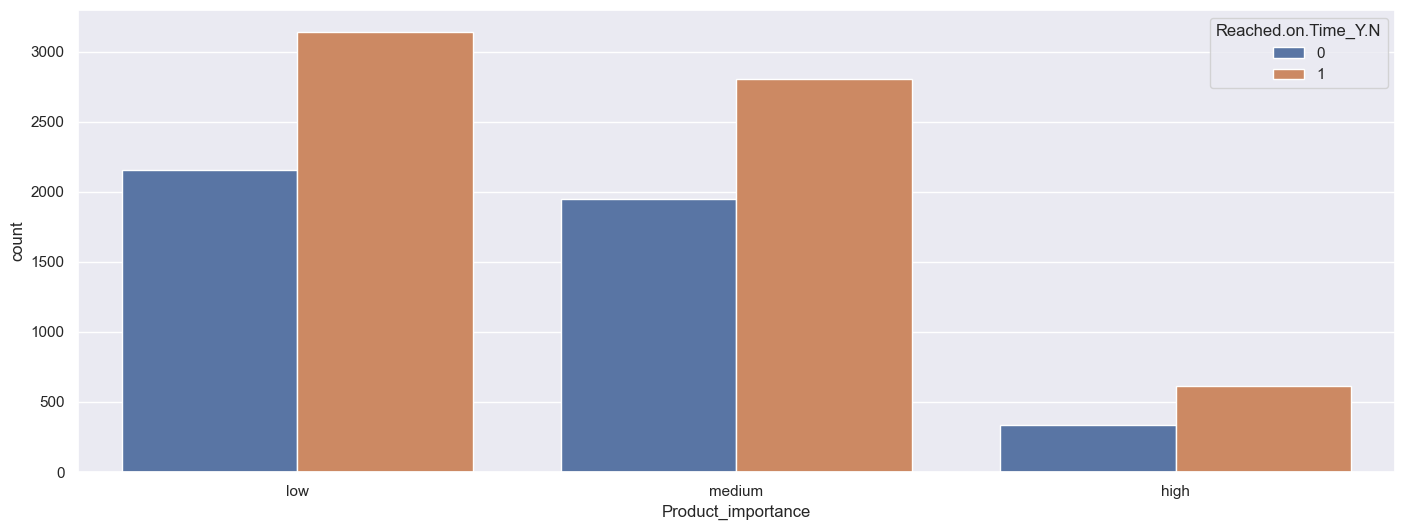

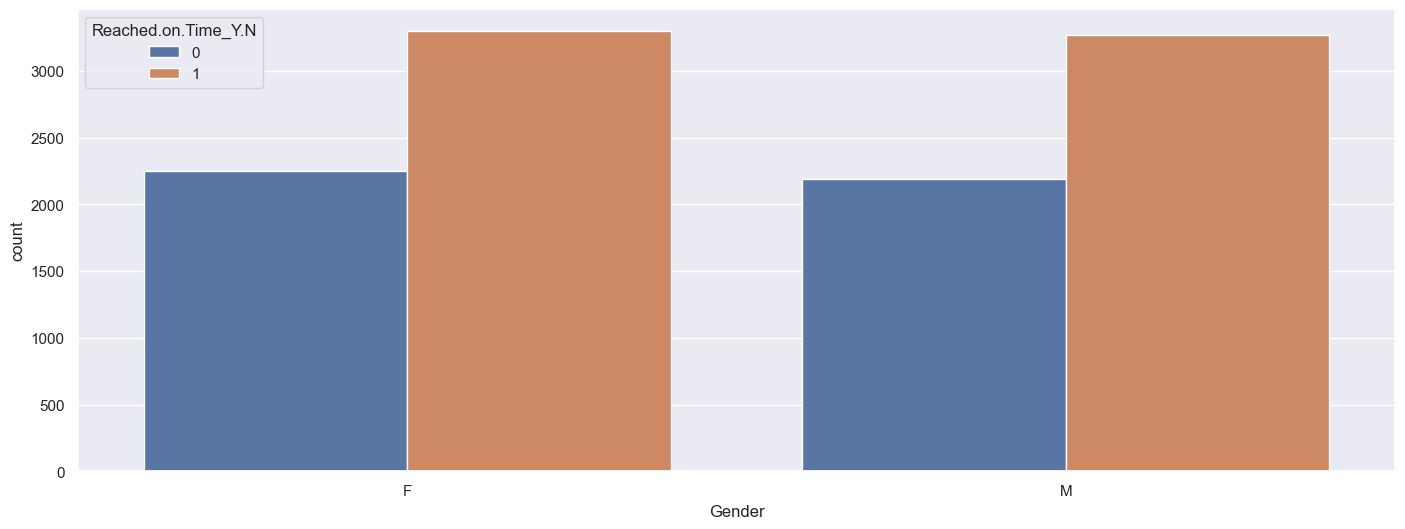

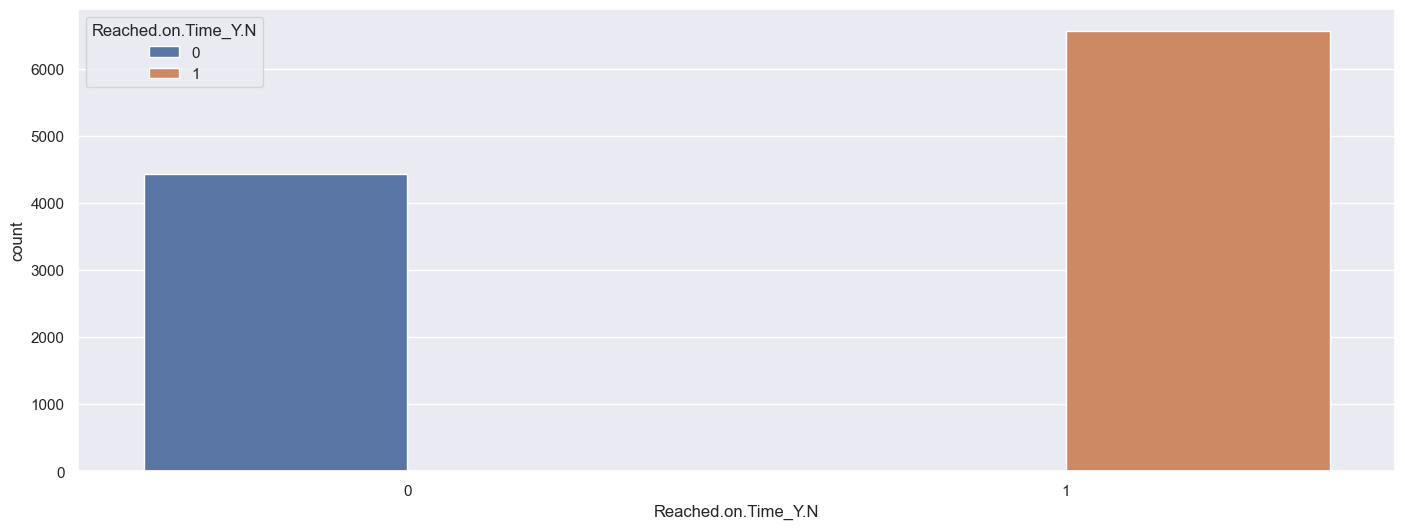

In [12]:
# Inpsect the interaction of product reached on time with categorical variables
for i in col_categorical:
    plt.figure(figsize = (17, 6))
    sns.countplot(x = df[i] , hue = 'Reached.on.Time_Y.N', data = df)
    plt.show()

**Interesting Points**
- Warehouse block F has the highest number of product counts and number of products that haven't reached on time.
- Shipping product by ship is the most popular choice for the customers.
- Most of the products are low priority product and this type of product holds the highest number of product that unable to reach on time.



# Encoding Data

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [15]:
# Label Encoding
le = LabelEncoder()

# Encode the categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [16]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.iloc[:, 1:-1]

In [19]:
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,0,44,1233
1,4,0,4,5,216,2,1,1,59,3088
2,0,0,2,2,183,4,1,1,48,3374
3,1,0,3,3,176,4,2,1,10,1177
4,2,0,2,2,184,3,2,0,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538
10995,1,2,4,1,232,5,2,0,6,1247
10996,2,2,5,4,242,5,1,0,4,1155
10997,4,2,5,2,223,6,2,1,2,1210


In [20]:
y = df.iloc[: , -1]

In [21]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [22]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
X_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
2400,3,2,2,5,171,3,2,0,13,1101
5559,1,2,4,1,144,4,2,1,6,5197
1143,1,2,3,3,224,2,1,0,37,3220
7699,4,2,2,1,149,4,2,0,7,5434
5731,4,1,3,4,191,5,2,0,4,4243
...,...,...,...,...,...,...,...,...,...,...
5734,2,1,3,5,275,2,1,0,7,4619
5191,4,1,5,5,187,4,2,0,9,5326
5390,0,2,4,2,137,2,2,0,2,5804
860,0,2,5,3,144,6,2,0,35,1009


In [24]:
X_test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
107,4,2,4,5,216,3,0,1,26,2053
5594,0,1,3,1,220,3,1,0,6,5572
6997,4,0,3,2,215,4,1,0,3,4042
3984,3,0,5,1,160,5,1,0,1,4672
3111,1,2,5,4,229,2,2,0,44,2419
...,...,...,...,...,...,...,...,...,...,...
172,2,2,3,4,148,3,1,1,56,1550
639,1,2,3,4,247,4,1,1,59,2939
4395,1,0,4,3,149,3,2,0,3,4781
2087,4,2,4,2,124,2,2,1,50,1592


In [25]:
y_train

2400    1
5559    1
1143    1
7699    0
5731    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Reached.on.Time_Y.N, Length: 7369, dtype: int64

In [26]:
y_test

107     1
5594    1
6997    0
3984    0
3111    1
       ..
172     1
639     1
4395    1
2087    1
3128    1
Name: Reached.on.Time_Y.N, Length: 3630, dtype: int64

In [27]:
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

In [28]:
X_train_scaled

array([[ 0.44451328,  0.63995506, -1.80455046, ..., -0.99905053,
        -0.01757396, -1.54119226],
       [-0.89933015,  0.63995506, -0.06412348, ...,  1.00095038,
        -0.45172994,  0.9573806 ],
       [-0.89933015,  0.63995506, -0.93433697, ..., -0.99905053,
         1.47096081, -0.24859561],
       ...,
       [-1.57125186,  0.63995506, -0.06412348, ..., -0.99905053,
        -0.69981906,  1.32765251],
       [-1.57125186,  0.63995506,  0.80609001, ..., -0.99905053,
         1.34691624, -1.59731255],
       [-0.22740843, -1.99458618, -0.06412348, ..., -0.99905053,
        -0.69981906,  0.55294852]])

In [29]:
X_test_scaled=scaler.transform(X_test)

In [30]:
X_test_scaled

array([[ 1.11643499,  0.63995506, -0.06412348, ...,  1.00095038,
         0.7887157 , -0.96046927],
       [-1.57125186, -0.67731556, -0.93433697, ..., -0.99905053,
        -0.45172994,  1.18613178],
       [ 1.11643499, -1.99458618, -0.93433697, ..., -0.99905053,
        -0.63779678,  0.25282697],
       ...,
       [-0.89933015, -1.99458618, -0.06412348, ..., -0.99905053,
        -0.63779678,  0.70361929],
       [ 1.11643499,  0.63995506, -0.06412348, ...,  1.00095038,
         2.27725047, -1.24168072],
       [-1.57125186, -0.67731556, -0.93433697, ...,  1.00095038,
         0.66467114, -1.15140026]])

# Feature Selection

In [31]:
X_train.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
Warehouse_block,1.000000,-0.001245,0.012555,0.021182,0.002629,-0.019594,0.006634,0.000581,0.005148,0.004504
Mode_of_Shipment,-0.001245,1.000000,-0.020720,0.010732,0.005790,0.000430,0.005289,-0.012763,0.011435,-0.004191
Customer_care_calls,0.012555,-0.020720,1.000000,0.008575,0.327282,0.181091,0.006030,0.013641,-0.141533,-0.277614
Customer_rating,0.021182,0.010732,0.008575,1.000000,-0.001294,0.007738,0.013727,0.007887,-0.003456,0.002347
Cost_of_the_Product,0.002629,0.005790,0.327282,-0.001294,1.000000,0.118028,0.016064,0.034448,-0.132573,-0.142563
Prior_purchases,-0.019594,0.000430,0.181091,0.007738,0.118028,1.000000,0.005123,-0.004858,-0.081831,-0.156550
Product_importance,0.006634,0.005289,0.006030,0.013727,0.016064,0.005123,1.000000,0.002674,-0.013967,0.009663
Gender,0.000581,-0.012763,0.013641,0.007887,0.034448,-0.004858,0.002674,1.000000,-0.031495,0.006832
Discount_offered,0.005148,0.011435,-0.141533,-0.003456,-0.132573,-0.081831,-0.013967,-0.031495,1.000000,-0.369813
Weight_in_gms,0.004504,-0.004191,-0.277614,0.002347,-0.142563,-0.156550,0.009663,0.006832,-0.369813,1.000000


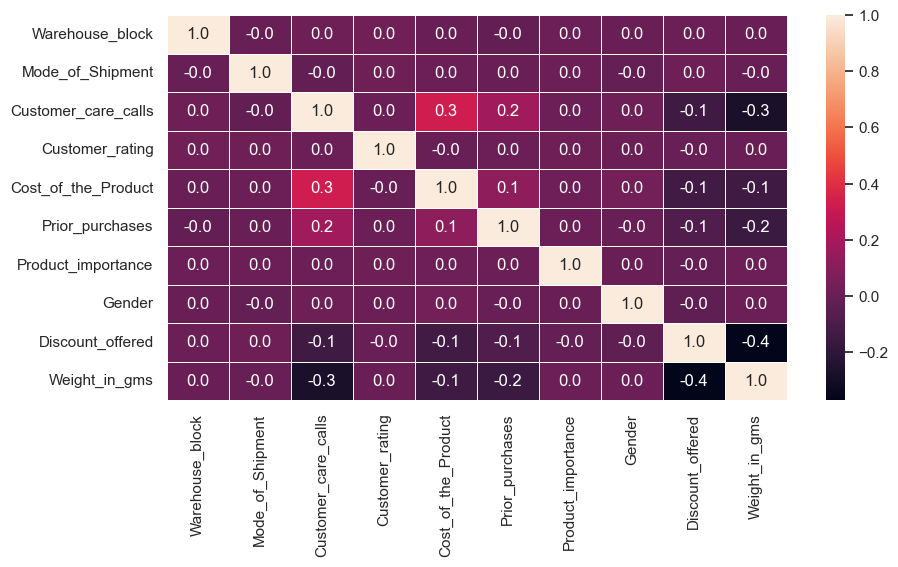

In [32]:
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(X_train.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax);

In [33]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr                

In [34]:
correlation(X_train,0.4)

set()

- The threshold set in the function is 0.4 which means that any attributes with correlation more than 0.4 will be shown in the set and be removed. However, it seems that there is no such strong relation between each independent variables.


# Model Building : Logistic Regression

## First Model

In [35]:
from sklearn.linear_model import LogisticRegression


log_reg=LogisticRegression()

In [36]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [37]:
y_pred = log_reg.predict(X_test_scaled)
print(y_pred)

[1 0 0 ... 0 1 1]


In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 813,  633],
       [ 689, 1495]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_pred)
print('The accuracy of model is {} %'.format(test_acc*100))

The accuracy of model is 63.58126721763085 %


In [40]:
# Model Summary
import statsmodels.api as sm
  
model = sm.Logit(y_test, X_test_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.590290
         Iterations 6


In [41]:
print(model.summary())

                            Logit Regression Results                           
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                 3630
Model:                           Logit   Df Residuals:                     3620
Method:                            MLE   Df Model:                            9
Date:                 Wed, 19 Apr 2023   Pseudo R-squ.:                  0.1220
Time:                         14:27:59   Log-Likelihood:                -2142.8
converged:                        True   LL-Null:                       -2440.6
Covariance Type:             nonrobust   LLR p-value:                1.796e-122
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0137      0.037      0.374      0.708      -0.058       0.086
x2            -0.0187      0.037     -0.506      0.613      -0.091       0.054
x3            -0.1259      0.042     -3.011 

## Second Model

- This model considers only the following four attributes which are statistically significant (x3,x5,x8,x9)

In [42]:
X_train.iloc[:,[2,5,8,9]]

,Customer_care_calls,Prior_purchases,Discount_offered,Weight_in_gms
2400,2,3,13,1101
5559,4,4,6,5197
1143,3,2,37,3220
7699,2,4,7,5434
5731,3,5,4,4243
...,...,...,...,...
5734,3,2,7,4619
5191,5,4,9,5326
5390,4,2,2,5804
860,5,6,35,1009


In [43]:
X_train_scaled_cut = pd.DataFrame(X_train_scaled).iloc[: , [2,5,8,9] ]
X_test_scaled_cut = pd.DataFrame(X_test_scaled).iloc[: , [2,5,8,9] ]

In [44]:
model2 = log_reg.fit(X_train_scaled_cut,y_train)

In [45]:
y_pred_2 = log_reg.predict(X_test_scaled_cut)
print(y_pred_2)

[1 0 0 ... 0 1 1]


In [46]:
confusion_matrix(y_test,y_pred_2)

array([[ 815,  631],
       [ 669, 1515]], dtype=int64)

In [47]:
test_acc_2 = accuracy_score(y_test, y_pred_2)
print('The accuracy of model is {} %'.format(test_acc_2*100))

The accuracy of model is 64.18732782369146 %


In [48]:
np.array(X_test_scaled_cut)

model2 = sm.Logit(y_test, np.array(X_test_scaled_cut)).fit()

Optimization terminated successfully.
         Current function value: 0.591251
         Iterations 6


In [49]:
print(model2.summary())

                            Logit Regression Results                           
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                 3630
Model:                           Logit   Df Residuals:                     3626
Method:                            MLE   Df Model:                            3
Date:                 Wed, 19 Apr 2023   Pseudo R-squ.:                  0.1206
Time:                         14:27:59   Log-Likelihood:                -2146.2
converged:                        True   LL-Null:                       -2440.6
Covariance Type:             nonrobust   LLR p-value:                2.875e-127
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1436      0.040     -3.553      0.000      -0.223      -0.064
x2            -0.1158      0.040     -2.892      0.004      -0.194      -0.037
x3             0.8883      0.054     16.545 

# Conclusion on the model
The second model including four variables is considered to be better than the first model since it has higher accuracy 64.18 % more than the first model which is 63.58 %. In addition, the second model is far less complex than the first model which included only four important features which are
1. Number of customer care calls
2. Number of prior purchases
3. Discount offered
4. Weight of the shipment(in grams)

The model indicates that the more the customer call made to enquire about the shipment, the higher chance that shipment will be made in time. The higher the weight and the number of purchase made, the higher chance that shipment will be made in time and **The more the discount offer to customer the higher the chance that the shipment will not make it on time**